# Die vergessenen Pandemien: Was die Schweiz aus ihrer Vergangenheit lernen kann
 
Pandemien wie COVID-19 haben uns gezeigt, wie verletzlich moderne Gesellschaften trotz technologischem Fortschritt sein können. Doch die Geschichte kennt viele solcher Gesundheitskrisen – auch in der Schweiz.  
 
Dieses Projekt visualisiert historische Daten zu Pandemien und Sterblichkeit in der Schweiz, um zu zeigen:
- wie Krankheiten sich über Kantone verbreiteten,
- wie Todesraten sich entwickelten,
- und was wir daraus für zukünftige Krisen lernen können.

In [49]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Legend, Title, Span
from bokeh.palettes import Category10
from bokeh.layouts import column, row
import matplotlib.pyplot as plt
import numpy as np
from bokeh.models import ColumnDataSource, HoverTool, Span, Range1d, LinearAxis, Label, LabelSet
from bokeh.models.formatters import NumeralTickFormatter


In [2]:
data_set1 = pd.read_excel("../Data/1_History_Pandemics.xlsx")
data_set2_mortality = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")
data_set2_incidence_weekly = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")
data_set2_population = pd.read_excel("../Data/2_Population_cantons.xlsx")
data_set3 = pd.read_excel("../Data/3_Todesursachen Schweiz ohne Alter 1876-2002.xlsx")

## Dataset 1 approx. 3

In [3]:
data_set1.describe()

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
count,143.00000,140.000000,3.000000,140.00000,3.000000,1.430000e+02,141.000000,77.000000,68.000000
mean,1951.00000,18.172899,74.326929,767.00000,6431.666667,5.195008e+06,0.656738,3.740260,-2.873529
std,41.42463,48.962370,31.572219,1883.48357,2685.667391,1.715657e+06,5.842117,6.033792,2.543568
min,1880.00000,0.038532,46.104776,3.00000,4029.000000,2.840501e+06,-13.800000,0.000000,-13.800000
25%,1915.50000,3.034354,57.278424,155.25000,4982.000000,3.855200e+06,-2.100000,0.700000,-4.025000
50%,1951.00000,7.818421,68.452072,422.00000,5935.000000,4.717200e+06,0.300000,2.500000,-2.300000
75%,1986.50000,19.202038,88.438006,839.25000,7633.000000,6.504124e+06,2.800000,4.900000,-0.975000
max,2022.00000,554.049400,108.423939,21491.00000,9331.000000,8.738791e+06,49.300000,49.300000,0.000000


In [4]:
data_set1.head(10)

,Jahr,Todesfälle_Grippe_100000,Todesfälle_Covid_100000,TodesfälleGrippe,TodesfälleCOVID,Population,Überasterblichkeit_Alles,ÜberasterblichkeitPlus,ÜberasterblichkeitMinus
0,1880,3.766941,NaN,107.0,NaN,2840501,NaN,0.0,0.0
1,1881,2.358739,NaN,67.0,NaN,2840501,NaN,0.0,0.0
2,1882,3.191577,NaN,91.0,NaN,2851255,1.0,1.0,NaN
3,1883,2.762012,NaN,79.0,NaN,2860234,-4.6,NaN,-4.6
4,1884,1.880705,NaN,54.0,NaN,2871264,-1.0,NaN,-1.0
5,1885,2.115360,NaN,61.0,NaN,2883670,7.2,7.2,NaN
6,1886,2.109133,NaN,61.0,NaN,2892184,3.2,3.2,NaN
7,1887,1.929966,NaN,56.0,NaN,2901605,-0.8,NaN,-0.8
8,1888,2.610578,NaN,76.0,NaN,2911233,-2.7,NaN,-2.7
9,1889,1.813270,NaN,53.0,NaN,2922897,2.4,2.4,NaN


---
# 1. Pandemic Death Rates (Bar Chart)

### **English:**
> **Major Pandemic Death Rates (per 100,000 Population)**  
>  
> This bar chart compares the death rates from major pandemics between 1889 and 2020.  
> The blue bars represent historical pandemics, while COVID-19 (2020) is highlighted in orange.  
> Values show deaths per 100,000 population for each pandemic year.

### **German:**
> **Todesraten großer Pandemien (pro 100.000 Einwohner)**  
>  
> Dieses Balkendiagramm vergleicht die Todesraten großer Pandemien zwischen 1889 und 2020.  
> Blaue Balken stehen für historische Pandemien, COVID-19 (2020) ist in Orange hervorgehoben.  
> Angezeigt werden die Todesfälle pro 100.000 Einwohner im jeweiligen Pandemie-Jahr.

---

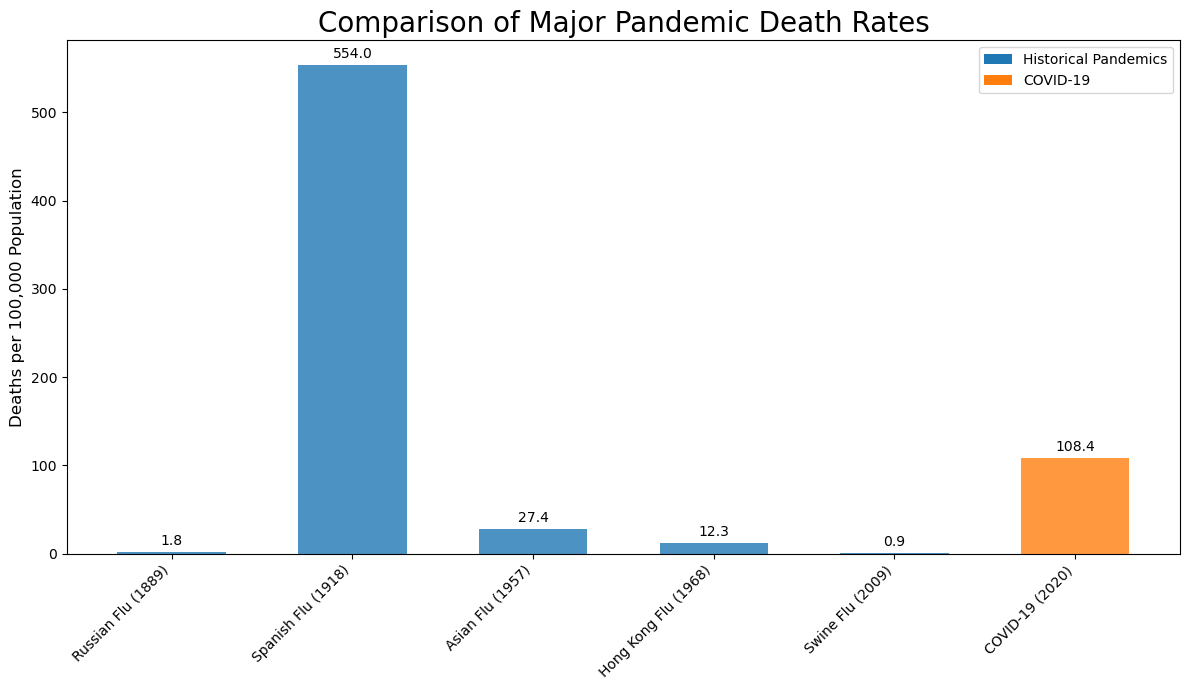

In [38]:
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]  # Major pandemic years
pandemic_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()

# Erstelle eine neue Spalte für die Todesfälle pro Pandemie
pandemic_data['Todesfälle_100000'] = pandemic_data['Todesfälle_Grippe_100000'].fillna(0)
# Ersetze COVID-Werte für 2020
pandemic_data.loc[pandemic_data['Jahr'] == 2020, 'Todesfälle_100000'] = pandemic_data.loc[pandemic_data['Jahr'] == 2020, 'Todesfälle_Covid_100000'].fillna(0)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Set width of bars
bar_width = 0.6
index = np.arange(len(pandemic_years))

# Erstelle eine Farbliste (alle blau außer COVID in orange)
colors = ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e']

# Create the bars (nur ein Balken pro Pandemie)
bars = ax.bar(index, pandemic_data['Todesfälle_100000'], 
              bar_width, color=colors, alpha=0.8)

# Add labels, title
ax.set_ylabel('Deaths per 100,000 Population', fontsize=12)
ax.set_title('Comparison of Major Pandemic Death Rates', fontsize=20)

# Add pandemic names with years directly in the x-tick labels
pandemic_names_with_years = ["Russian Flu (1889)", "Spanish Flu (1918)", "Asian Flu (1957)", 
                           "Hong Kong Flu (1968)", "Swine Flu (2009)", "COVID-19 (2020)"]
ax.set_xticks(index)
ax.set_xticklabels(pandemic_names_with_years, rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', 
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points", 
                   ha='center', va='bottom')

# Füge eine Legende hinzu
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', label='Historical Pandemics'),
    Patch(facecolor='#ff7f0e', label='COVID-19')
]
ax.legend(handles=legend_elements, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


---
# 2. Population and Pandemic Deaths Over Time (Interactive Line Chart)

### **English:**
> **Population Growth and Pandemic Mortality in Switzerland (1880–2022)**  
>  
> This interactive line chart shows the population development alongside influenza and COVID-19 death rates over time.  
> The black dashed line represents Switzerland’s total population, while the colored lines show death rates per 100,000 people.  
> Major pandemics are marked with vertical dashed lines.

### **German:**
> **Bevölkerungsentwicklung und Pandemiemortalität in der Schweiz (1880–2022)**  
>  
> Dieses interaktive Liniendiagramm zeigt die Entwicklung der Bevölkerung sowie die Todesraten durch Influenza und COVID-19 im Zeitverlauf.  
> Die schwarze gestrichelte Linie stellt die Gesamtbevölkerung dar, die farbigen Linien zeigen die Todesfälle pro 100.000 Einwohner.  
> Große Pandemien sind durch vertikale gestrichelte Linien hervorgehoben.

---

In [75]:

output_notebook()


pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
pandemic_names = ["Russian Flu", "Spanish Flu", "Asian Flu", "Hong Kong Flu", "Swine Flu", "COVID-19"]

# Daten vorbereiten
pandemic_data = data_set1.copy()
highlight_data = data_set1[data_set1['Jahr'].isin(pandemic_years)].copy()


source_main = ColumnDataSource(pandemic_data)
source_highlights = ColumnDataSource(highlight_data)


p = figure(
    title="Pandemic Mortality vs. Population Growth (1889-2020)",
    height=600,
    width=950,
    x_axis_label="Year",
    y_axis_label="Population",
    tools=""  
)


p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.y_range = Range1d(0, pandemic_data['Population'].max() * 1.1)


max_deaths = max(pandemic_data['Todesfälle_Grippe_100000'].max(), 
               pandemic_data['Todesfälle_Covid_100000'].max())
p.extra_y_ranges = {"deaths": Range1d(0, max_deaths * 1.1)}
p.add_layout(LinearAxis(y_range_name="deaths", axis_label="Deaths per 100,000 Population"), 'right')


population_line = p.line(
    x='Jahr', y='Population', source=source_main,
    line_width=3, line_dash='dashed', color='black',
    alpha=0.7, legend_label="Population"
)


flu_line = p.line(
    x='Jahr', y='Todesfälle_Grippe_100000', source=source_main,
    y_range_name='deaths', line_width=3, color=Category10[3][0],
    alpha=0.8, legend_label="Influenza Deaths"
)


covid_line = p.line(
    x='Jahr', y='Todesfälle_Covid_100000', source=source_main,
    y_range_name='deaths', line_width=3, color=Category10[3][1],
    alpha=0.8, legend_label="COVID-19 Deaths"
)


for year in pandemic_years:
    if year in pandemic_data['Jahr'].values:
        vline = Span(location=year, dimension='height', 
                   line_color='darkgray', line_dash='dashed', line_width=1)
        p.add_layout(vline)


flu_circles = p.circle(
    x='Jahr', y='Todesfälle_Grippe_100000', source=source_highlights,
    y_range_name='deaths', size=10, color=Category10[3][0],
    alpha=0.8, line_color='black', line_width=1
)


covid_circles = p.circle(
    x='Jahr', y='Todesfälle_Covid_100000', source=source_highlights,
    y_range_name='deaths', size=10, color=Category10[3][1],
    alpha=0.8, line_color='black', line_width=1
)



# Tooltip für Crosshair
hover = HoverTool(
    tooltips=[
        ("Year", "@Jahr"),
        ("Population", "@Population{0,0}"),
        ("Influenza Deaths", "@{Todesfälle_Grippe_100000}{0.0} per 100k"),
        ("COVID Deaths", "@{Todesfälle_Covid_100000}{0.0} per 100k")
    ],
    renderers=[population_line],
    mode='vline',  
    line_policy='nearest'
)


tools = [
    PanTool(),
    BoxZoomTool(),
    WheelZoomTool(),
    ResetTool(),
    crosshair,  # Crosshair hinzufügen
    hover,
    point_hover
]
p.add_tools(*tools)

# Legende und Styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0.7

p.title.text_font_size = '14pt'
p.title.align = 'center'

p.grid.grid_line_alpha = 0.3

# Plot anzeigen
show(p)

Loading BokehJS ...

---
# 3. Excess Mortality Over Time (Scatter + Line Chart)

### **English:**
> **Excess Mortality in Switzerland (1880–2022)**  
>  
> This graph shows the annual excess mortality rates in Switzerland from 1880 to 2022.  
> Red points represent years with positive excess mortality (more deaths than expected), green points represent negative excess mortality (fewer deaths than expected).  
> Major pandemic years are indicated with vertical dotted lines, and a dashed horizontal line marks the 0% level.

### **German:**
> **Übersterblichkeit in der Schweiz (1880–2022)**  
>  
> Dieses Diagramm zeigt die jährlichen Übersterblichkeitsraten in der Schweiz von 1880 bis 2022.  
> Rote Punkte stehen für Jahre mit positiver Übersterblichkeit (mehr Todesfälle als erwartet), grüne Punkte für negative Übersterblichkeit (weniger Todesfälle als erwartet).  
> Große Pandemiejahre sind durch vertikale gepunktete Linien markiert, eine horizontale gestrichelte Linie zeigt die 0%-Marke.

---

In [88]:
output_notebook()

# Prepare the data
df = data_set1.copy()

# Drop rows where either 'Jahr' or 'Überasterblichkeit_Alles' is missing
df = df.dropna(subset=['Jahr', 'Überasterblichkeit_Alles'])

# Create a color column based on excess mortality
df['color'] = df['Überasterblichkeit_Alles'].apply(lambda x: 'red' if x > 0 else 'green')

# Create the ColumnDataSource
source = ColumnDataSource(df)

# Create the figure
p = figure(
    title="Excess Mortality in Switzerland (1880–2022)",
    height=600,
    width=950,
    x_axis_label="Year",
    y_axis_label="Excess Mortality (%)",
    tools="pan,box_zoom,reset,wheel_zoom,hover",
    tooltips=[
        ("Year", "@Jahr"),
        ("Excess Mortality", "@Überasterblichkeit_Alles{0.0}%")
    ]
)

# Line showing the trend
p.line('Jahr', 'Überasterblichkeit_Alles', source=source, line_width=3, color="gray", alpha=0.6)

# Colored points
p.scatter(
    'Jahr', 'Überasterblichkeit_Alles', source=source,
    size=8, color='color', line_color='black', line_width=1
)

# Horizontal line at 0%
zero_line = Span(location=0, dimension='width', line_color='black', line_dash='dashed', line_width=2)
p.add_layout(zero_line)

# Mark pandemic years
pandemic_years = [1889, 1918, 1957, 1968, 2009, 2020]
for year in pandemic_years:
    if year in df['Jahr'].values:
        vline = Span(location=year, dimension='height', line_color='darkgray', line_dash='dotted', line_width=1)
        p.add_layout(vline)

# Styling
p.title.text_font_size = '14pt'
p.title.align = 'center'
p.y_range = Range1d(-15, 50)

p.grid.grid_line_alpha = 0.3

# Show the plot
show(p)


Loading BokehJS ...

## Dataset 2 approx 7

In [11]:
# Population of the individual cantons and Switzerland as a whole
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category20_20
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource

# Bokeh im Notebook aktivieren
output_notebook()

# Daten einlesen
population_df = pd.read_excel("../Data/2_Population_cantons.xlsx")

# Erste Spalte korrekt als "Year" benennen
population_df.rename(columns={population_df.columns[0]: "Year"}, inplace=True)
population_df = population_df.drop(columns='CH')

# Zahlen bereinigen und in float umwandeln (z. B. '1’000’000' → 1000000.0)
for col in population_df.columns[1:]:
    population_df[col] = (
        population_df[col]
        .astype(str)
        .str.replace("'", "")
        .str.replace(",", "")
        .astype(float)
    )

# Daten ins Long-Format bringen
df_long = population_df.melt(id_vars="Year", var_name="Canton", value_name="Population")
# Werte durch 1 Mio teilen:
df_long["Population"] = df_long["Population"] / 1_000_000

# Farbpalette für max. 20 Farben
palette = Category20_20

# Hauptplot vorbereiten
p = figure(title="Bevölkerungsentwicklung der Schweizer Kantone (1950–1970)",
           x_axis_label="Jahr", y_axis_label="Einwohnerzahl (in Mio.)",
           width=950, height=550, tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Kantone alphabetisch sortieren
cantons = sorted(df_long["Canton"].unique())

# Linien für alle Kantone zeichnen
for i, canton in enumerate(cantons):
    df_k = df_long[df_long["Canton"] == canton]
    source = ColumnDataSource(df_k)
    p.line(x='Year', y='Population', source=source,
           line_width=2, legend_label=canton,
           color=palette[i % len(palette)])  # Wiederholt Palette bei >20 Kantonen

# Hover aktivieren
hover = p.select_one(HoverTool)
hover.tooltips = [("Kanton", "@Canton"), ("Jahr", "@Year"), ("Einwohner (Mio.)", "@Population{0.00}")]

# Interaktive Legende
p.legend.location = "right"
p.legend.click_policy = "hide"

p.yaxis.formatter = NumeralTickFormatter(format= '0.00')
# Plot anzeigen
show(p)

Loading BokehJS ...

In [12]:
# Influenza waves monthly (per canton and Switzerland)
# Bokeh im Notebook aktivieren
output_notebook()

# Daten einlesen
incidence_df = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")
incidence_df
incidence_monthly = incidence_df.copy().drop(columns=['StartReportingPeriod', 'EndReportingPeriod'])
incidence_monthly

Loading BokehJS ...

,Month,Parameter,ZH,BE,LU,UR,SZ,OW,NW,GL,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,CH
0,12,Cases Influenza,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,Cases Influenza,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,5
2,12,Cases Influenza,5,2,0,0,0,0,0,0,...,4,3,0,0,2,0,0,0,0,20
3,1,Cases Influenza,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,28
4,1,Cases Influenza,4,4,0,0,0,0,0,0,...,0,30,0,0,15,0,0,2,0,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,11,Cases Influenza,11,7,6,0,0,0,6,10,...,5,10,0,0,0,0,0,2,2,99
310,11,Cases Influenza,9,3,0,0,0,0,0,0,...,2,8,0,0,0,30,0,3,3,72
311,12,Cases Influenza,4,4,0,0,0,0,0,0,...,5,0,10,0,0,0,0,5,0,41
312,12,Cases Influenza,12,5,4,0,0,0,0,0,...,18,13,0,0,0,0,0,0,8,94


In [13]:
# Influenza waves weekly (per canton and Switzerland)
# Influenza waves monthly (per canton and Switzerland)
# Bokeh im Notebook aktivieren
output_notebook()

# Daten einlesen
incidence_df = pd.read_excel("../Data/2_Data_cantons_incidence_weekly_56_58_NEW.xlsx")
incidence_df
incidence_weekly = incidence_df.copy().drop(columns='Month')
incidence_weekly

Loading BokehJS ...

,StartReportingPeriod,EndReportingPeriod,Parameter,ZH,BE,LU,UR,SZ,OW,NW,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,CH
0,1952-12-14,1952-12-20,Cases Influenza,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1952-12-21,1952-12-27,Cases Influenza,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,5
2,1952-12-28,1953-01-03,Cases Influenza,5,2,0,0,0,0,0,...,4,3,0,0,2,0,0,0,0,20
3,1953-01-04,1953-01-10,Cases Influenza,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,28
4,1953-01-11,1953-01-17,Cases Influenza,4,4,0,0,0,0,0,...,0,30,0,0,15,0,0,2,0,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1958-11-16,1958-11-22,Cases Influenza,11,7,6,0,0,0,6,...,5,10,0,0,0,0,0,2,2,99
310,1958-11-23,1958-11-29,Cases Influenza,9,3,0,0,0,0,0,...,2,8,0,0,0,30,0,3,3,72
311,1958-11-30,1958-12-06,Cases Influenza,4,4,0,0,0,0,0,...,5,0,10,0,0,0,0,5,0,41
312,1958-12-07,1958-12-13,Cases Influenza,12,5,4,0,0,0,0,...,18,13,0,0,0,0,0,0,8,94


In [14]:
# # Comparison of influenza deaths and general deaths (per canton and Switzerland) (bis August 1958, da Daten fehlen)
output_notebook()

mortality_df = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")

# Parameter-Spalte normalisieren
mortality_df["Parameter"] = mortality_df["Parameter"].str.strip().str.lower()
mortality_df["Parameter"] = mortality_df["Parameter"].replace({
    "deaths total": "deaths total",
    "total deaths": "deaths total",
    "total death": "deaths total"
})

# Monatsnamen in Zahlen umwandeln
month_map = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
mortality_df["Month"] = mortality_df["Month"].str.strip().str.lower().map(month_map)

# Influenza- und Total-Deaths für CH extrahieren
influenza_ch = mortality_df[mortality_df["Parameter"] == "deaths influenza"][["Year", "Month", "CH"]]
total_ch = mortality_df[mortality_df["Parameter"] == "deaths total"][["Year", "Month", "CH"]]

# Jahres- und Monatsweise Zusammenführen
comparison_df = influenza_ch.copy()
comparison_df = comparison_df.rename(columns={"CH": "Influenza_Deaths"})
comparison_df["Total_Deaths"] = total_ch["CH"].values

# Datum zusammenbauen
comparison_df["Date"] = pd.to_datetime(dict(year=comparison_df["Year"], month=comparison_df["Month"], day=1))

# Nur bis August 1958 behalten
comparison_df = comparison_df[(comparison_df["Year"] < 1958) | ((comparison_df["Year"] == 1958) & (comparison_df["Month"] <= 8))]


source = ColumnDataSource(comparison_df)

colors = Category10[3]

# Plot erstellen
p = figure(title="Comparison: Influenza Deaths vs. Total Deaths in Switzerland (1953–1958)",
           x_axis_type="datetime",
           width=950, height=550,
           x_axis_label="Datum", y_axis_label="Anzahl Todesfälle",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Linie für Influenza-Todesfälle
p.line(x='Date', y='Influenza_Deaths', source=source,
       line_width=3, color=colors[0], legend_label="Influenza Deaths")

# Linie für Gesamttodesfälle
p.line(x='Date', y='Total_Deaths', source=source,
       line_width=3, color=colors[1], legend_label="Total Deaths")

# Hover-Tool 
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Datum", "@Date{%Y-%m}"),
    ("Influenza-Todesfälle", "@Influenza_Deaths{0,0}"),
    ("Gesamte Todesfälle", "@Total_Deaths{0,0}")
]
hover.formatters = {'@Date': 'datetime'}
hover.mode = 'vline'

# Interaktive Legende
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Plot anzeigen
show(p)


Loading BokehJS ...

Hinweis: Für die Monate September bis Dezember 1958 liegen keine vollständigen Total-Todesfalldaten vor. Die Analysen basieren daher auf den vollständig dokumentierten Jahren 1953 bis August 1958.

In [15]:
print(comparison_df)

    Year  Month  Influenza_Deaths  Total_Deaths       Date
0   1953      1              42.0        4573.0 1953-01-01
1   1953      2             475.0        5174.0 1953-02-01
2   1953      3             446.0        5250.0 1953-03-01
3   1953      4              78.0        4193.0 1953-04-01
4   1953      5              17.0        4090.0 1953-05-01
..   ...    ...               ...           ...        ...
63  1958      4              38.0        4187.0 1958-04-01
64  1958      5              17.0        4067.0 1958-05-01
65  1958      6               9.0        3812.0 1958-06-01
66  1958      7               6.0        3853.0 1958-07-01
67  1958      8               4.0        3499.0 1958-08-01

[68 rows x 5 columns]


In [16]:
#Influenza deaths as a proportion (%) of total deaths (für bessere Übersicht)
output_notebook()

# 📂 Daten einlesen
mortality_df = pd.read_excel("../Data/2_All_cantons_1953-1958_Mortality.xlsx")

# Parameter-Spalte normalisieren
mortality_df["Parameter"] = mortality_df["Parameter"].str.strip().str.lower()
mortality_df["Parameter"] = mortality_df["Parameter"].replace({
    "deaths total": "deaths total",
    "total deaths": "deaths total",
    "total death": "deaths total"
})

# Monatsnamen in Zahlen umwandeln
month_map = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
mortality_df["Month"] = mortality_df["Month"].str.strip().str.lower().map(month_map)

# Influenza- und Total-Deaths für CH extrahieren
influenza_ch = mortality_df[mortality_df["Parameter"] == "deaths influenza"][["Year", "Month", "CH"]]
total_ch = mortality_df[mortality_df["Parameter"] == "deaths total"][["Year", "Month", "CH"]]

# Zusammenführen
comparison_df = influenza_ch.copy()
comparison_df = comparison_df.rename(columns={"CH": "Influenza_Deaths"})
comparison_df["Total_Deaths"] = total_ch["CH"].values

# Nur Daten bis August 1958 verwenden
comparison_df = comparison_df[(comparison_df["Year"] < 1958) | ((comparison_df["Year"] == 1958) & (comparison_df["Month"] <= 8))]

# Influenza-Anteil (%) berechnen
comparison_df["Influenza_Share"] = (comparison_df["Influenza_Deaths"] / comparison_df["Total_Deaths"]) * 100

# Neues Datum für X-Achse
comparison_df["Date"] = pd.to_datetime(dict(year=comparison_df["Year"], month=comparison_df["Month"], day=1))

source = ColumnDataSource(comparison_df)

# Plot erstellen
p = figure(title="Influenza Deaths as Percentage of Total Deaths (1953–1958)",
           x_axis_type="datetime",
           width=950, height=550,
           x_axis_label="Datum", y_axis_label="Influenza-Todesfälle [%]",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Linie für Influenza-Anteil
p.line(x='Date', y='Influenza_Share', source=source,
       line_width=3, color=Category10[3][2], legend_label="Influenza Anteil (%)")

# Hover-Tool konfigurieren
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Datum", "@Date{%Y-%m}"),
    ("Influenza-Anteil (%)", "@Influenza_Share{0.00}%")
]
hover.formatters = {'@Date': 'datetime'}
hover.mode = 'vline'

# Legende
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Plot anzeigen
show(p)


Loading BokehJS ...

In [17]:
# Visualise 1957 and 1958 (weekly cases and monthly deaths)


## Dataset 3

In [18]:
# Causes of death infectious diseases, respiratory or-gans, neoplasms, nervous system and circulatory organs, blood metabolism, digestive organs, haemato-poietic system, violent death etc. by year
# Noch überarbeiten (Lücken im Plot). Vielleicht in der Story erwähnen: Warum steigen "Neoplasms (Cancers)" und "Circulatory Diseases" ab ca. 1950 stark an? (Bevölkerungsalterung, moderne Lebensweise etc.)
# Warum sind Infektionskrankheiten fast auf Null gefallen? (z.B. Antibiotika, Impfungen).
output_notebook()

causes_df = pd.read_excel("../Data/3_Todesursachen Schweiz ohne Alter 1876-2002.xlsx", header=[3])

# Keep only relevant columns
causes_df = causes_df[[
    'Jahr',
    'Infektions- und parasitäre Krankheiten',
    'Atmungsorgane',
    'Neubildungen',
    'Nervensystem und Kreislauforgane',
    'Blut, Stoffwechsel 8)',
    'Ernährungsapparat, Verdauungsorgane',
    'Gewaltsamer Tod'
]]

# Rename columns to English
causes_df = causes_df.rename(columns={
    'Jahr': 'Year',
    'Infektions- und parasitäre Krankheiten': 'Infectious Diseases',
    'Atmungsorgane': 'Respiratory Diseases',
    'Neubildungen': 'Neoplasms (Cancers)',
    'Nervensystem und Kreislauforgane': 'Nervous and Circulatory Diseases',
    'Blut, Stoffwechsel 8)': 'Blood and Metabolic Diseases',
    'Ernährungsapparat, Verdauungsorgane': 'Digestive Diseases',
    'Gewaltsamer Tod': 'Violent Deaths'
})

# Remove empty or NaN rows if necessary
causes_df = causes_df.dropna()

source = ColumnDataSource(causes_df)

colors = Category10[8]

# Plot
p = figure(title="Main Causes of Death in Switzerland (1876–2002)",
           x_axis_label="Year", y_axis_label="Number of Deaths",
           width=950, height=550,
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Add a line for each cause of death
for i, cause in enumerate(causes_df.columns[1:]):  # Skip 'Year'
    p.line(x='Year', y=cause, source=source,
           line_width=2, legend_label=cause,
           color=colors[i % len(colors)])

# hover tool
hover = p.select_one(HoverTool)
hover.tooltips = [("Year", "@Year")] + [(cause, f"@{{{cause}}}{{0,0}}") for cause in causes_df.columns[1:]]
hover.mode = 'vline'

# Configure legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
show(p)


Loading BokehJS ...

In [19]:
# Zeige alle Spaltennamen
print(causes_df.columns.tolist())


['Year', 'Infectious Diseases', 'Respiratory Diseases', 'Neoplasms (Cancers)', 'Nervous and Circulatory Diseases', 'Blood and Metabolic Diseases', 'Digestive Diseases', 'Violent Deaths']


In [20]:
# Take a closer look at infectious diseases (subgroups) over the years

In [21]:
# Possibly also take a closer look at the other sub-groups over the years